<a href="https://colab.research.google.com/github/mf1060/GENAI26/blob/main/HW2/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW 2

Michael Furey

Dr. Forouraghi

CSC 688

2/10/2026


The following notebook discusses the results for homework #2. This assignment is focused on observing the results of a diffusion model for generating images with prompts. This notebook uses models from the [class's Github repository](https://github.com/bforoura/GENAI26/blob/main/Module1/Image_Diffusion.ipynb).

The notebooks also uses a runtime calculation (e.g. time.start()) with Python code described on the following [site](https://www.geeksforgeeks.org/python/python-measure-time-taken-by-program-to-execute/).

In [1]:
# the needed libraries
!pip install diffusers transformers accelerate



In [2]:
import diffusers
import os

# Disable the problematic progress bar widgets
diffusers.logging.disable_progress_bar()
os.environ["TQDM_DISABLE"] = "1"

In [3]:
import torch
from diffusers import StableDiffusionPipeline

#Importing time to calculate the runtime.
import time

# Load the model into memory
pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16
).to("cuda")





Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading weights:   0%|          | 0/196 [00:00<?, ?it/s]

CLIPTextModel LOAD REPORT from: /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-v1-5/snapshots/451f4fe16113bff5a5d2269ed5ad43b0592e9a14/text_encoder
Key                                | Status     |  | 
-----------------------------------+------------+--+-
text_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Loading weights:   0%|          | 0/396 [00:00<?, ?it/s]

StableDiffusionSafetyChecker LOAD REPORT from: /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-v1-5/snapshots/451f4fe16113bff5a5d2269ed5ad43b0592e9a14/safety_checker
Key                                               | Status     |  | 
--------------------------------------------------+------------+--+-
vision_model.vision_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


# Trial A: Guidance Scale = 7.5, 5 steps

The first trial runs the prompt with 5 inference steps and a guidance scale of 7.5.

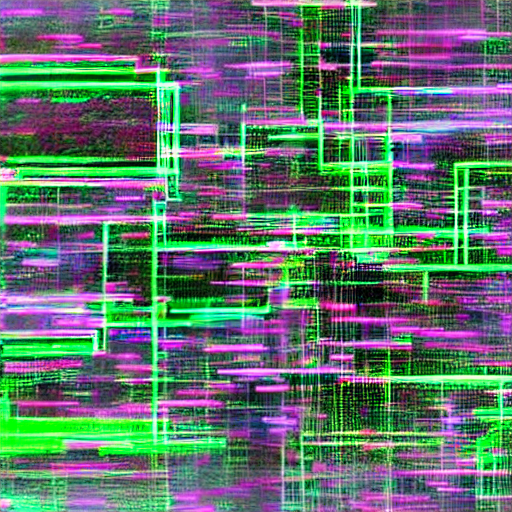

In [4]:
# Create a generator with a fixed seed
# We are using seed = 1234
generator = torch.Generator("cuda").manual_seed(1234)

pipe.set_progress_bar_config(disable=True)

image = pipe(
    prompt = "A cyberpunk hacker terminal showing green lines of code, reflection of a neon city on the screen, 8k, raytracing.",
    generator=generator,
    num_inference_steps=5,
    guidance_scale=7.5
).images[0]

image

The model produces an image with green lines that could resemble a computer terminal. The image looks more like an abstract painting with geometric shapes and green and purple brush strokes.  

# Trial B: Guidance Scale = 7.5, 50 steps

The second trial runs the prompt with 50 inference steps and a guidance scale of 7.5.

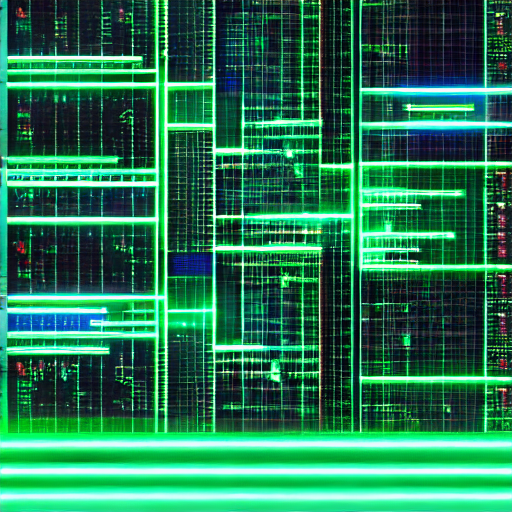

In [5]:
# Create a generator with a fixed seed
# We are using seed = 1234
generator = torch.Generator("cuda").manual_seed(1234)

pipe.set_progress_bar_config(disable=True)

image = pipe(
    prompt = "A cyberpunk hacker terminal showing green lines of code, reflection of a neon city on the screen, 8k, raytracing.",
    generator=generator,
    num_inference_steps=50,
    guidance_scale=7.5
).images[0]

image

The run at inference steps = 50 creates a more defined image. The image looks much more like a terminal with green lines. However, it is difficult to make out any figures or decimals in the terminal. With one perspective, the image looks a bit like an array of servers. But the image still uses more abstract shapes that do not have very much definition.

# Trial C: Guidance Scale = 30, steps = 50

The third trial runs the prompt with 50 inference steps but with a guidance scale of 30. First, I will run Trial C with half as many steps to measure the time it takes for it to run.

In [6]:
# Create a generator with a fixed seed
# We are using seed = 1234
generator = torch.Generator("cuda").manual_seed(1234)

pipe.set_progress_bar_config(disable=True)

start = time.time()

image = pipe(
    prompt = "A cyberpunk hacker terminal showing green lines of code, reflection of a neon city on the screen, 8k, raytracing.",
    generator=generator,
    num_inference_steps=25,
    guidance_scale=30
).images[0]

end = time.time()

print("Trial C - 25 Steps:")
print(end - start)

Trial C - 25 Steps:
4.127316236495972


Next, I will run Trial C with 50 inference steps.

Trial C - 50 Steps:
8.011550426483154


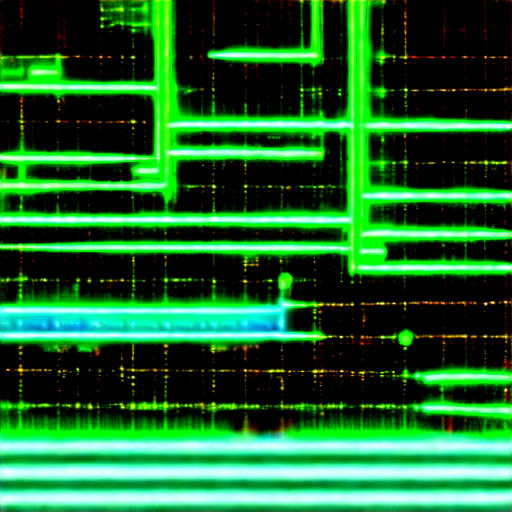

In [7]:
# Create a generator with a fixed seed
# We are using seed = 1234
generator = torch.Generator("cuda").manual_seed(1234)

pipe.set_progress_bar_config(disable=True)

start = time.time()

image = pipe(
    prompt = "A cyberpunk hacker terminal showing green lines of code, reflection of a neon city on the screen, 8k, raytracing.",
    generator=generator,
    num_inference_steps=50,
    guidance_scale=30
).images[0]

end = time.time()

print("Trial C - 50 Steps:")
print(end - start)

image

This run created an image that appears to pay close attention to the phrase, "green lines" in the prompt. The image displays thicker green lines than the image for Trial B. The image looks more like a painting than a photo image.

The following is the rubric for interpreting results.

| Description | Score Range |
|---| --- |
|(Perfect) Sharp code text, distinct terminal geometry, and realistic neon lighting| 9-10|
|(High): Recognizable subjects, but with slight muddy textures or minor artifacts. | 7–8 |
|(Fair): You can follow the vibe, but it looks more like an oil painting than a sharp photo. | 5–6 |
|(Poor): Features are melting; the code is just green smears. | 3–4
| (Incoherent): Mostly noise or a deep-fried mess of colors. | 1–2



The following are the results for the experiment above including my scores.


| Trial | Steps |	Guidance (CFG) |	Predicted Behavior |	Image Result (Description) | Coherence (1-10) |
|---| --- | --- | --- | --- | ---|
|A	| 5|7.5| Under-baked  | The model produces an image with green lines that could resemble a computer terminal. The image looks more like an abstract painting with geometric shapes and green and purple brush strokes.| 5
|B	|50	|7.5|Optimal| The image looks much more like a terminal with green lines. However, it is difficult to make out any figures or decimals in the terminal. With one perspective, the image looks a bit like an array of servers. But the image still uses more abstract shapes that do not have very much definition.  | 5
|C	|50	| 30.0 | Oversaturated| This run created an image that appears to pay close attention to the phrase, "green lines" in the prompt. The image displays thicker green lines than the image for Trial B. The image looks more like a painting than a photo image. | 3


**1. Compare Trial A to Trial B. Why does 5 steps result in a blurry ghost of an image?**

The reason why the run in trial A results in a more blurry image is because it contains more noise than the image in Trial B. With each inference step, the model removes a little more noise from the image to generate an image closest to the meaning of the tokens in the prompt.

**2. In Trial C, look at the colors. Did they become more realistic, or did they start to become too bright/dark? Explain why.**

The image in Trial C looks much more saturated with bright green colors. This is likely due to the higher guidance scale. The higher guidance scale prioritizes the meaning of the prompt over photo-realistic quality. For example, the image in Trial C appears to follow the words, "green", "line", and "neon" very closely to produce an image that shows neon green lines, but not too much else.

**3. Does doubling the steps double the time it takes to generate the image? Why or why not?**

Doubling the number of steps would take more time. This is because with each step, the model is removing a little bit of noise. It would also make sense that the time would double, because image variation is constant and double the number of steps would result in double the runtime.

This expected behavior is confirmed by the runtime. For Trial C, I measured the runtime to compare when the model takes 25 steps to the time when the model takes 50 steps. The model with 50 steps takes about twice as long as the model that takes 25 steps.  

# Extra Credit

# Guidance Scale = 7.5, 50  steps - this time using a negative prompt.

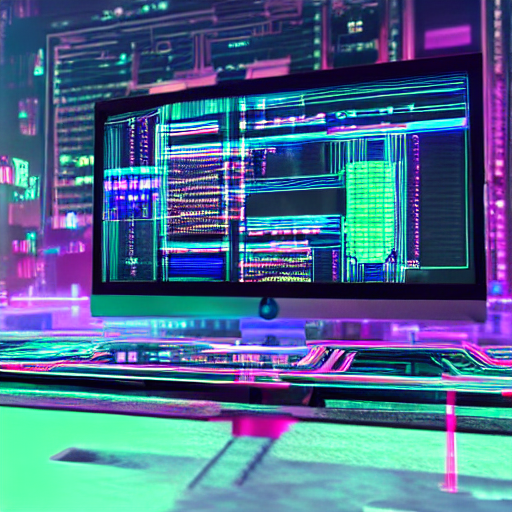

In [8]:
# Create a generator with a fixed seed
# We are using seed = 1234
generator = torch.Generator("cuda").manual_seed(1234)

pipe.set_progress_bar_config(disable=True)

prompt = "A cyberpunk hacker terminal showing green lines of code, reflection of a neon city on the screen, 8k, raytracing"
neg_prompt = "green, text, letters, numerals, matrix"

image = pipe(
    prompt = prompt,
    #Using a negative prompt
    negative_prompt = neg_prompt,
    generator=generator,
    num_inference_steps=50,
    guidance_scale=7.5
).images[0]

display(image)

# Analysis

**Explain why a Negative Prompt can be more powerful than just changing the positive prompt.
Does the image still look like a hacker terminal without any text or the color green?**

The result still shows a hacker terminal without text, but with a light green. It does not display a dark green. This is the clearest image yet of a terminal, and it is likely because the negative prompt was helpful in focusing the prompt on term, "terminal."

Negative prompts are more powerful than adding to the positive prompt. This is because the model can better interpret a positive than a negative. For example, in class, we discussed that models are poor at mapping images with "no green" or "no text" in it's joint latent space. Instead, the negative prompt navigates away from images with "green" or images with "text" towards ones that are more relevant to the prompt. The negative prompt enables this behavior.

**Rate the result on a scale of 1–10 based on how well it kept the "cyberpunk" theme despite the restrictions.**

| Trial | Steps |	Guidance (CFG) |	Predicted Behavior |	Image Result (Description) | Coherence (1-10) |
|---| --- | --- | --- | --- | ---|
|Extra Credit (Negative Prompt)	| 50|7.5| Refined  | The model produces the clearest image yet of a hacker terminal| 9

I think that the negative prompt enhanced the "cyberpunk" theme, because it is the first image that has produced a terminal. The image is the most coherent, compared to the other three.
